<a href="https://colab.research.google.com/github/AndresMontesDeOca/TimeSeries/blob/main/Unidad_2/AST_Clase_2_ejercicio_asincronico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 2</h3>
    <h5>Ejercitacion asincronica</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

 <h1>Esta actividad asincrónica se segmentará en dos partes. La primera implicará la interpretación de gráficos de autocorrelación, mientras que en la segunda abordaremos un ejemplo seleccionado por usted, en el cual trabajarán con algunos enunciados.</h1>

In [1]:
# IMPORTAR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller

 <h2> PRIMERA PARTE</h2>

<li type="square">Primera parte - ej - 1) Ejecutar los dos códigos a continuación y luego determinar en cada caso, en base a la grafica de autocorrelación, si las series son o no estacionarias.</li>

 <h3> CODIGO 1 </h3>

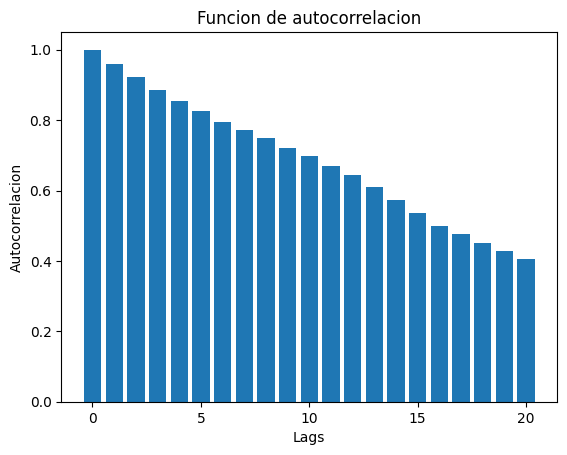

In [2]:
# CORRER EL CODIGO

# Simulacion de serie 1
np.random.seed(0)
tiempo = np.arange(0, 100)
estacionalidad = 10 * np.sin(2 * np.pi * tiempo / 12)
data_codigo_1 = 2 * tiempo + estacionalidad + np.random.randn(100) * 5

# Calculo de la función de autocorrelación
lags_maximos = 20
autocorr = acf(data_codigo_1, nlags=lags_maximos)

# Graficar de la función de autocorrelación
plt.bar(range(lags_maximos+1), autocorr)
plt.xlabel('Lags')
plt.ylabel('Autocorrelacion')
plt.title('Funcion de autocorrelacion')
plt.show()

In [3]:
''' Escribir aqui la respuesta (¿ es o no es estacionaria? - JUSTIFICAR)

- La serie data_codigo_1 muestra una autocorrelación significativa en varios lags, lo que indica que la serie tiene una estructura temporal que persiste a lo largo del tiempo.
- Esto es un indicativo de que la serie no es estacionaria, ya que una serie estacionaria tendría una caída rápida en la autocorrelación después del primer lag.

'''

' Escribir aqui la respuesta (¿ es o no es estacionaria? - JUSTIFICAR)\n\n\n\n\n\n\n'

 <h3> CODIGO 2 </h3>

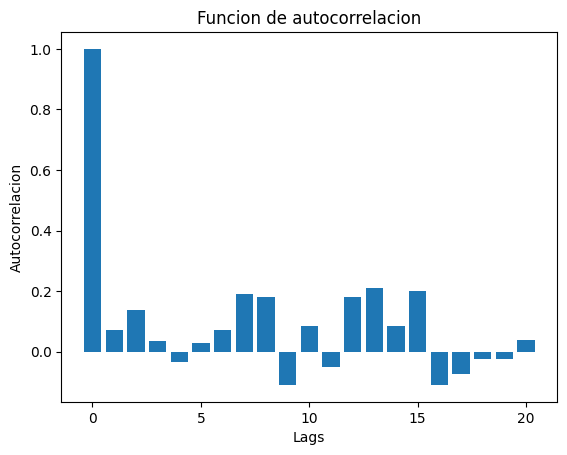

In [4]:
# CORRER EL CODIGO

# Simulacion de serie 2
np.random.seed(0)
data = np.random.randn(100)

# Calculo de la función de autocorrelación
autocorr = acf(data, nlags=lags_maximos)

# Graficar de la función de autocorrelación
plt.bar(range(lags_maximos+1), autocorr)
plt.xlabel('Lags')
plt.ylabel('Autocorrelacion')
plt.title('Funcion de autocorrelacion')
plt.show()

In [5]:
''' Escribir aqui la respuesta (¿ es o no es estacionaria? - JUSTIFICAR)

- El lag 0 siempre tiene una autocorrelación de 1, ya que cualquier serie está perfectamente correlacionada consigo misma.
- Para los lags siguientes, la autocorrelación cae rápidamente hacia cero y oscila alrededor de cero para todos los lags.
  Esto es característico de una serie de ruido blanco, donde los valores no están correlacionados entre sí.
- No se observa una estructura clara de autocorrelación en los lags posteriores, lo que indica que no hay patrones temporales evidentes en la serie.

'''

' Escribir aqui la respuesta (¿ es o no es estacionaria? - JUSTIFICAR)\n\n\n\n\n\n\n'

 <h2> SEGUNDA PARTE</h2>

 Buscar un data set público de interés, descargarlo, importarlo y seguir las consignas.

<li type="square">1) Leer la base y configurar la/s variables de interes como serie/s de tiempo.</li>

In [51]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

################################# Datasets ###################################
# Air Pasangers
id = '1LPBLoZkwhO6VVwxi8ltTdIhEcdDE7cCz'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('city_temperature.csv.zip')
data = pd.read_csv('city_temperature.csv.zip', compression='zip', encoding='latin1') # Cargamos el Dataset


<ipython-input-51-aeeefc0bef60>:19: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('city_temperature.csv.zip', compression='zip', encoding='latin1') # Cargamos el Dataset


In [53]:
# escriba aqui su codigo

# Traigo solo los datos de Buenos Aires
data_arg = data.query('Country == "Argentina"')[['Day', 'Month', 'Year', 'AvgTemperature']].copy()

# Rellenar los valores inválidos (-99) con el valor anterior válido
data_arg['AvgTemperature'].replace(-99, np.nan, inplace=True)
data_arg['AvgTemperature'].fillna(method='ffill', inplace=True)

# Genero la columna Date, y elimino lo que no necesito
data_arg['Date'] = pd.to_datetime(data_arg[['Year', 'Month', 'Day']])
data_arg.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Seteo la nueva columna Date como Index
data_arg.set_index('Date', inplace=True)

# Eliminar fechas duplicadas y establecer frecuencia Diaria
data_arg = data_arg[~data_arg.index.duplicated(keep='first')]
data_arg = data_arg.asfreq('D')

# Convertir la temperatura de Fahrenheit a Celsius, redondeando a un decimal
data_arg['AvgTemperature'] = np.round((data_arg['AvgTemperature'] - 32) * 5/9, 1)

print(data_arg.info())
display(data_arg.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9265 entries, 1995-01-01 to 2020-05-13
Freq: D
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AvgTemperature  9265 non-null   float64
dtypes: float64(1)
memory usage: 144.8 KB
None


,AvgTemperature
Date,
1995-01-01,28.0
1995-01-02,23.9
1995-01-03,23.2
1995-01-04,25.1
1995-01-05,26.4




<li type="square">2) Graficar la/s variable/s en el tiempo.</li>

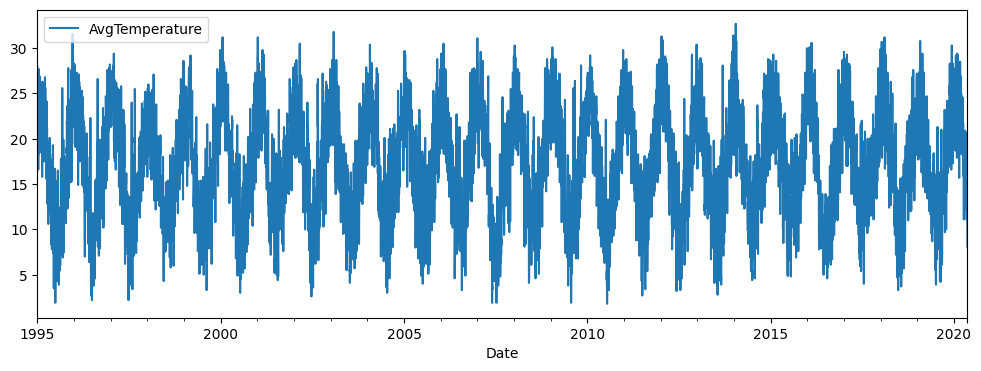

In [54]:
# escriba aqui su codigo

# No se si es necesario completar la serie, por los eliminados con AvgTemperature -99
data_arg.plot(figsize=(12, 4))
plt.show()

<li type="square">3) Graficar el Correlograma y analizar su comportamiento.</li>

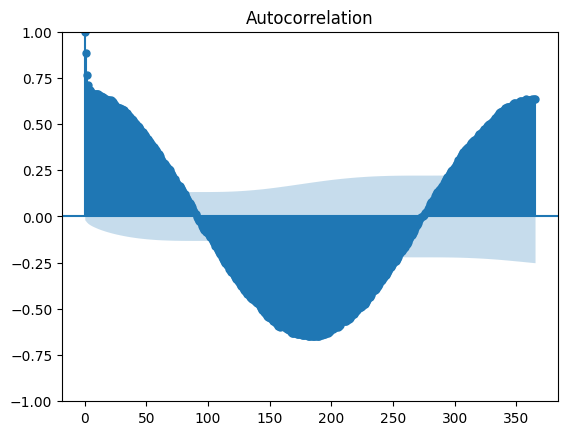

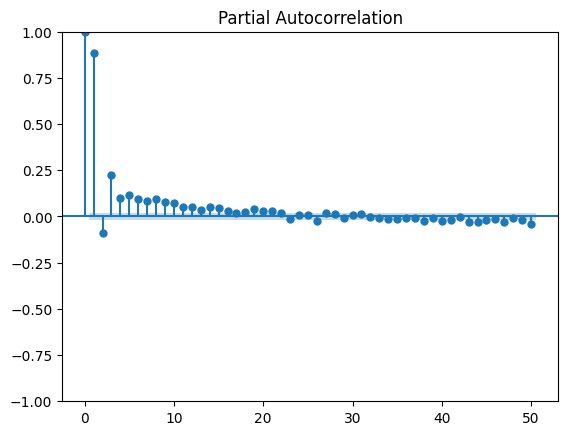

In [59]:
# escriba aqui su
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_acf(data_arg, lags=365)
plt.show()

plot_pacf(data_arg, lags=50)
plt.show()


In [9]:
'''
Analize brevemente aqui el comportamiento

- ACF: Los picos periódicos sugieren una estacionalidad en los datos, posiblemente relacionados con las estaciones del año.
- PACF: Solo los primeros lags tienen una correlación significativa con la serie temporal después de eliminar los efectos de los lags intermedios
AR(1) o AR(3)


'''

'\nAnalize brevemente aqui el comportamiento\n\n\n\n\n\n\n\n\n\n'


<li type="square">4) Realizar Estadística Descriptiva de la/s variable/s.</li>

Text(0, 0.5, 'Frecuencia')

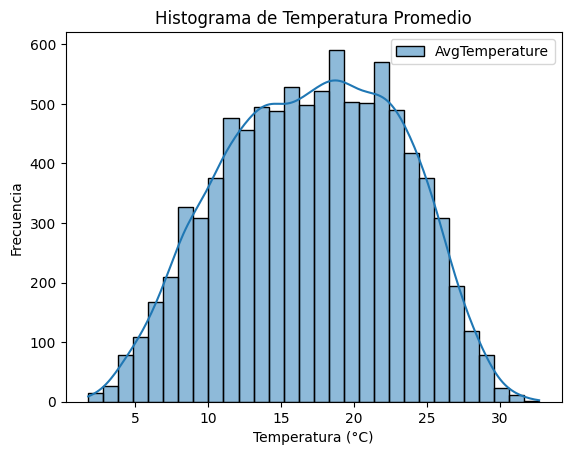

In [65]:
# escriba aqui su codigo
import seaborn as sns

# Histograma
sns.histplot(data_arg, kde=True, bins=30, color='skyblue')
plt.title('Histograma de Temperatura Promedio')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')

In [11]:
'''
Escriba aqui los analisis

- La temperatura en Buenos Aires muestra una distribución aproximadamente simétrica con un ligero sesgo hacia la izquierda
- La serie temporal revela patrones estacionales claros con fluctuaciones regulares a lo largo del año

'''

'\nEscriba aqui los analisis\n\n\n\n\n\n\n\n'